In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from mpl_toolkits.mplot3d import Axes3D

In [39]:
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
print(df.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [40]:
print(df.head())
print(df.tail())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0      1.0      168      0      1.0      2   
1   53    1   0       140   203    1      0.0      155      1      3.1      0   
2   70    1   0       145   174    0      1.0      125      1      2.6      0   
3   61    1   0       148   203    0      1.0      161      0      0.0      2   
4   62    0   0       138   294    1      1.0      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0      1.0      164      1      0.0   
1021   60    1   0       125   258    0      0.0      141      1      2.8   
1022   47    1   0       110   275    0      0.0      118      1      1.0   
1023   50    0   0       110   254    0      0.0      159      0      0.0

In [41]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1024.000000  1025.000000  1025.000000  1023.000000   
mean      0.149268     0.529297   149.114146     0.336585     1.072043   
std       0.356527     0.527931    23.005724     0.472772     1.176008   
min       0.000000     0.000000    71.000000  

In [42]:
print(df.isnull().sum())
print("Null values before imputation:\n", df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64
Null values before imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64


In [43]:
df.fillna(df.mean(), inplace=True)
print("Null values after imputation:\n", df.isnull().sum())

Null values after imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [44]:
Q1 = df['chol'].quantile(0.25)
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
print("Shape before removing outliers:", df.shape)

Shape before removing outliers: (1025, 14)


In [45]:
df = df[~((df['chol'] < (Q1 - 1.5 * IQR)) | (df['chol'] > (Q3 + 1.5 * IQR)))]
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (1009, 14)


In [46]:
mean_chol = np.mean(df['chol'])
median_chol = np.median(df['chol'])
std_chol = np.std(df['chol'])

In [47]:
mean_bp_with_disease = np.mean(df[df['target'] == 1]['trestbps'])
mean_bp_without_disease = np.mean(df[df['target'] == 0]['trestbps'])

max_thalach = np.max(df['thalach'])
min_thalach = np.min(df['thalach'])

In [48]:
print(f"Mean Cholesterol: {mean_chol}")
print(f"Median Cholesterol: {median_chol}")
print(f"Standard Deviation of Cholesterol: {std_chol}")
print(f"Mean Blood Pressure with Disease: {mean_bp_with_disease}")
print(f"Mean Blood Pressure without Disease: {mean_bp_without_disease}")
print(f"Max Thalach: {max_thalach}")
print(f"Min Thalach: {min_thalach}")

Mean Cholesterol: 242.98315163528247
Median Cholesterol: 239.0
Standard Deviation of Cholesterol: 45.36263654625848
Mean Blood Pressure with Disease: 129.20309477756285
Mean Blood Pressure without Disease: 133.97764227642276
Max Thalach: 202
Min Thalach: 71


In [49]:
sorted_by_chol = df.sort_values(by='chol', ascending=False)
high_chol_patients = df[df['chol'] > 300]

abnormal_ecg_patients = df[(df['age'] > 60) & (df['restecg'] > 0)]

In [50]:
reshaped_data = np.reshape(df.values, (df.shape[0], -1))
split_data = np.array_split(reshaped_data, 2)

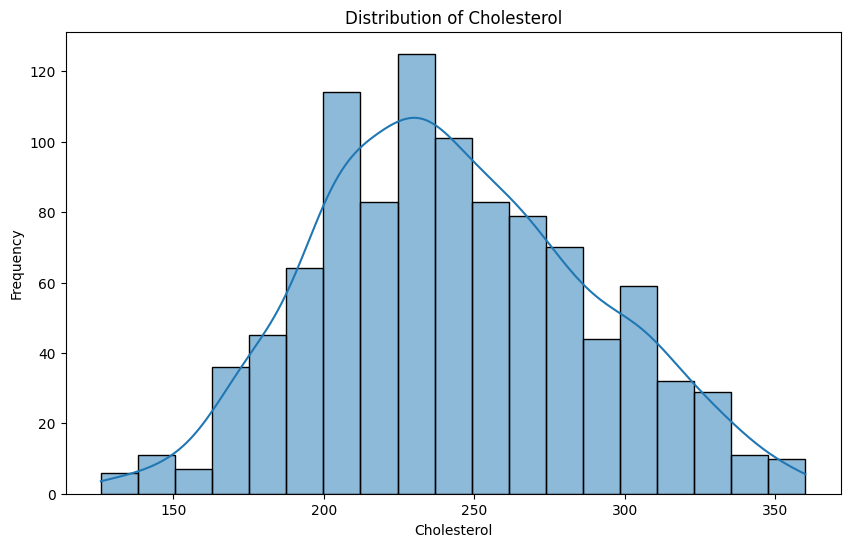

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], kde=True)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

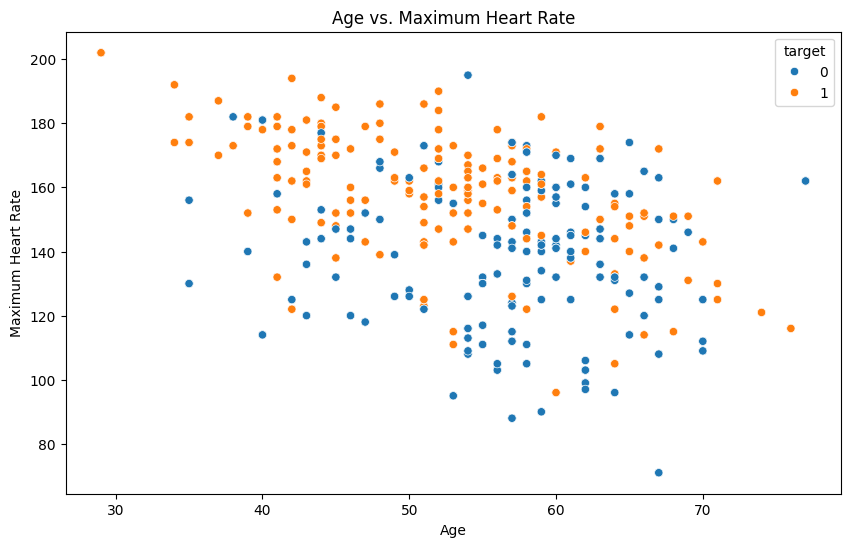

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df)
plt.title('Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

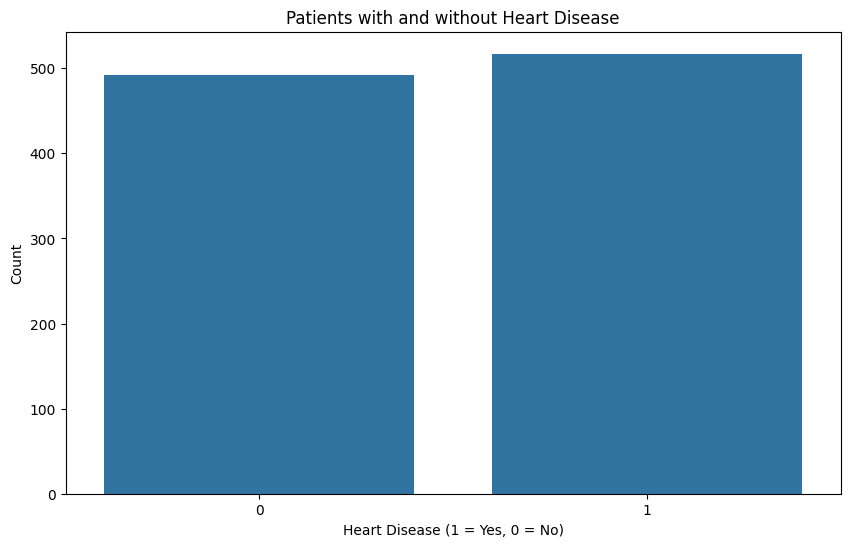

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df)
plt.title('Patients with and without Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

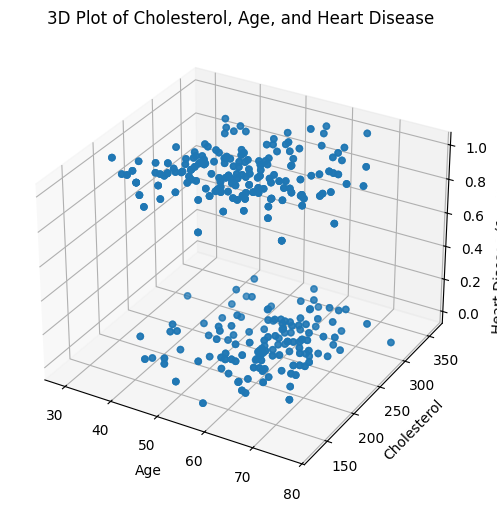

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['chol'], df['target'])
ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Heart Disease (1 = Yes, 0 = No)')
plt.title('3D Plot of Cholesterol, Age, and Heart Disease')
plt.show()

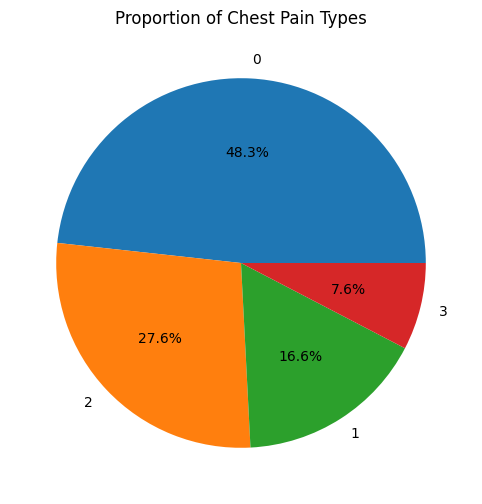

In [55]:
plt.figure(figsize=(10, 6))
df['cp'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Chest Pain Types')
plt.ylabel('')
plt.show()

In [56]:
# This_Code_is_Written_By_[Mohamed-Ibrahim]